Importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file CSV.

In [ ]:
df = pd.read_csv('/work/My-Drive/Datasets/DeathPerContinent/deathperbycontinent.csv')
df.head()

,Years,Africa,Asia,Europe,Latin America and the Caribbean (UN),Northern America (UN),Oceania (UN),World,Unnamed: 8
0,1950,"6,062,986","31,626,510","6,473,233","2,925,484","1,551,914",148.409,"48,788,536",NaN
1,1951,"6,132,451","31,092,766","6,609,794","2,938,142","1,584,821",156.578,"48,514,550",NaN
2,1952,"6,154,863","30,549,918","6,265,135","2,925,067","1,600,065",151.564,"47,646,612",NaN
3,1953,"6,188,063","30,398,354","6,220,937","2,924,775","1,617,795","149,160","47,499,084",NaN
4,1954,"6,233,523","30,052,708","6,072,645","2,914,769","1,578,409","150,750","47,002,804",NaN


In [ ]:
df.shape #This tell us the number of rows and columns.

(72, 9)

In [ ]:
df.columns #This tell us the columns.

Index(['Years', 'Africa', 'Asia', 'Europe',
       'Latin America and the Caribbean (UN)', 'Northern America (UN)',
       'Oceania (UN)', 'World', 'Unnamed: 8'],
      dtype='object')

In [ ]:
df.index # This tell us the rows.

RangeIndex(start=0, stop=72, step=1)

In [ ]:
(
    df
    .isnull()
    .sum()
) #This tell us the number of null values in each column.

Years                                    0
Africa                                   0
Asia                                     0
Europe                                   0
Latin America and the Caribbean (UN)     0
Northern America (UN)                    0
Oceania (UN)                             0
World                                    0
Unnamed: 8                              71
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 8'], inplace=True) # This drop the column 'Unnamed: 8'.

In [ ]:
df.head()

,Years,Africa,Asia,Europe,Latin America and the Caribbean (UN),Northern America (UN),Oceania (UN),World
0,1950,"6,062,986","31,626,510","6,473,233","2,925,484","1,551,914",148.409,"48,788,536"
1,1951,"6,132,451","31,092,766","6,609,794","2,938,142","1,584,821",156.578,"48,514,550"
2,1952,"6,154,863","30,549,918","6,265,135","2,925,067","1,600,065",151.564,"47,646,612"
3,1953,"6,188,063","30,398,354","6,220,937","2,924,775","1,617,795","149,160","47,499,084"
4,1954,"6,233,523","30,052,708","6,072,645","2,914,769","1,578,409","150,750","47,002,804"


We convert type object to int.

In [ ]:
list_continent = ['Africa', 'Asia', 'Europe','Latin America and the Caribbean (UN)', 'Northern America (UN)', 'Oceania (UN)', 'World']
for col in list_continent:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')#This code changes the type of columns.

Types of data.

In [ ]:
df.dtypes #This tell us the new data types.

Years                                     int64
Africa                                    int64
Asia                                      int64
Europe                                    int64
Latin America and the Caribbean (UN)      int64
Northern America (UN)                     int64
Oceania (UN)                            float64
World                                     int64
dtype: object

Continents with most deaths since 1950 to 2021.

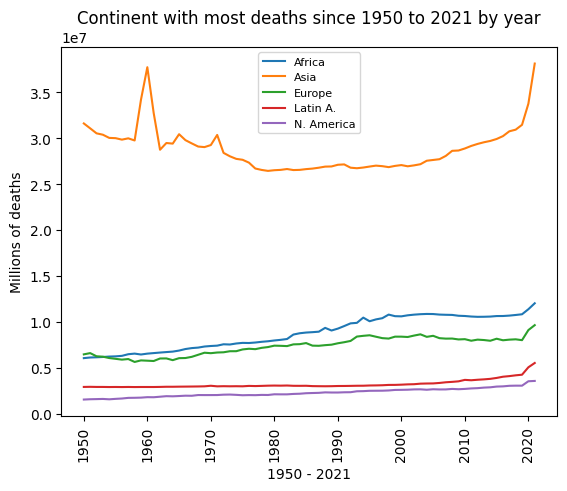

In [ ]:

columns_and_labels = [
    ('Africa', 'Africa'),
    ('Asia', 'Asia'),
    ('Europe', 'Europe'),
    ('Latin America and the Caribbean (UN)', 'Latin A.'),
    ('Northern America (UN)', 'N. America')
]

for column, label in columns_and_labels:
    sns.lineplot(x='Years', y=column, data=df, label=label)

plt.legend(loc='upper center', fontsize=8)
plt.xticks(rotation=90)
plt.ylabel('Millions of deaths')
plt.xlabel('1950 - 2021')
plt.title('Continent with most deaths since 1950 to 2021 by year')
plt.show()

In [ ]:
dict_continent = {'Africa': 0, 'Asia': 0, 'Europe': 0, 'Latin America and the Caribbean (UN)': 0, 'Northern America (UN)': 0, 'Oceania (UN)': 0}
  
for continent in dict_continent:
    dict_continent[continent] = df[continent].sum()
  
df_total = pd.DataFrame.from_dict(dict_continent, orient='index')
df_total.rename(index={'Latin America and the Caribbean (UN)': 'Latin A.', 'Northern America (UN)': 'N. America', 'Oceania (UN)': 'Oceania'}, inplace=True)
df_total


,0
Africa,6.340940e+08
Asia,2.077410e+09
Europe,5.308551e+08
Latin A.,2.331258e+08
N. America,1.657776e+08
Oceania,2.173635e+06


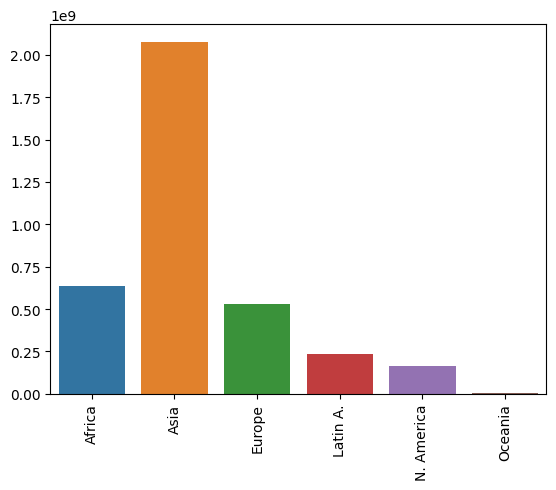

In [ ]:
sns.barplot(x=df_total.index, y=df_total.values.flatten())
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Oceania (UN)'].sum()

2173635.161

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ebf7e6f-d13b-4dc8-949f-273d1d771407' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>